In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer

# Load the CSV file
bbox_csv_path = r"D:\edi5\BBox_List_2017.csv"
bbox_data = pd.read_csv(bbox_csv_path)

# Drop unnecessary columns
bbox_data = bbox_data.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])

# Check cleaned dataset
print("Cleaned Data:\n", bbox_data.head())
images_path = r"D:\edi5\image"  # Folder containing NIH X-ray images
output_masks_path = "D:\edi5\masks"

# Load the bounding box data
bbox_data = pd.read_csv(bbox_csv_path)

# Create masks for each image
def generate_masks(bbox_data, images_path, output_masks_path, img_size=(1024, 1024)):
    if not os.path.exists(output_masks_path):
        os.makedirs(output_masks_path)
    
    for _, row in bbox_data.iterrows():
        image_name = row['Image Index']
        x, y, w, h = int(row['Bbox [x']), int(row['y']), int(row['w']), int(row['h]'])

        # Load the image to get its dimensions
        image_path = os.path.join(images_path, image_name)
        try:
            with Image.open(image_path) as img:
                original_size = img.size  # (width, height)
        except FileNotFoundError:
            print(f"Image {image_name} not found. Skipping.")
            continue

        # Create an empty mask
        mask = np.zeros((original_size[1], original_size[0]), dtype=np.uint8)

        # Draw the bounding box on the mask
        mask[y:y+h, x:x+w] = 1

        # Save the mask
        mask_image = Image.fromarray(mask * 255)
        mask_image.save(os.path.join(output_masks_path, f"{os.path.splitext(image_name)[0]}_mask.png"))

        print(f"Mask created for {image_name}.")

# Generate the masks
generate_masks(bbox_data, images_path, output_masks_path)


Cleaned Data:
         Image Index Finding Label     Bbox [x           y           w  \
0  00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
1  00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
2  00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
3  00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
4  00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   

           h]  
0   79.186441  
1  313.491525  
2  216.949153  
3   55.322034  
4   78.101695  
Mask created for 00013118_008.png.
Mask created for 00014716_007.png.
Mask created for 00029817_009.png.
Mask created for 00014687_001.png.
Mask created for 00017877_001.png.
Mask created for 00003148_004.png.
Mask created for 00012515_002.png.
Mask created for 00022098_006.png.
Mask created for 00014198_000.png.
Mask created for 00021007_000.png.
Mask created for 00030674_000.png.
Mask created for 00003945_004.png.
Mask created for 00000808_002.

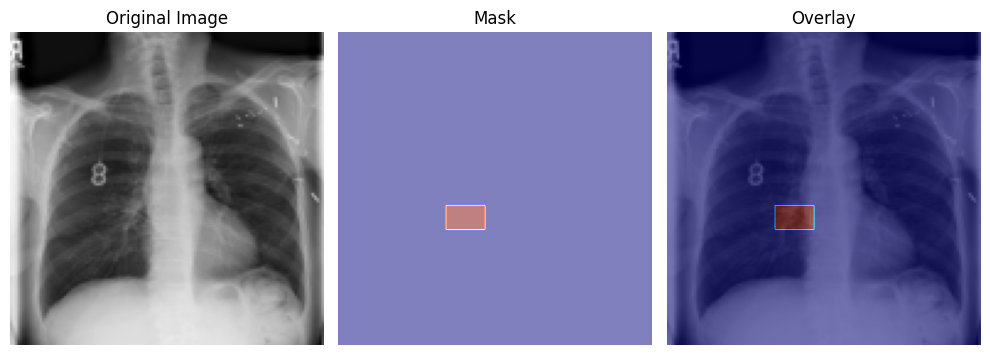

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def visualize_mask_overlay(image_path, mask_path, alpha=0.5, colormap='jet', img_size=(128, 128)):
    """
    Visualize the overlay of a mask on its corresponding image.
    
    Args:
    - image_path (str): Path to the image file.
    - mask_path (str): Path to the mask file.
    - alpha (float): Transparency level for the mask overlay (0 to 1).
    - colormap (str): Matplotlib colormap for the mask.
    - img_size (tuple): Resize dimensions for the image and mask (default: (128, 128)).
    
    Returns:
    - None: Displays the overlay.
    """
    try:
        # Load and preprocess the image
        image = Image.open(image_path).convert("L").resize(img_size)
        image = np.array(image) / 255.0  # Normalize to [0, 1]

        # Load and preprocess the mask
        mask = Image.open(mask_path).resize(img_size, Image.NEAREST)
        mask = np.array(mask)

        # Create the overlay
        plt.figure(figsize=(10, 5))

        # Original Image
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')

        # Mask
        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap=colormap, alpha=alpha)
        plt.title("Mask")
        plt.axis('off')

        # Overlay
        plt.subplot(1, 3, 3)
        plt.imshow(image, cmap='gray')
        plt.imshow(mask, cmap=colormap, alpha=alpha)
        plt.title("Overlay")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")

# Example Usage:
image_path = r"D:\edi5\image\00000072_000.png"
mask_path = r"D:\edi5\masks\00000072_000_mask.png"
visualize_mask_overlay(image_path, mask_path, alpha=0.5, colormap='jet', img_size=(128, 128))


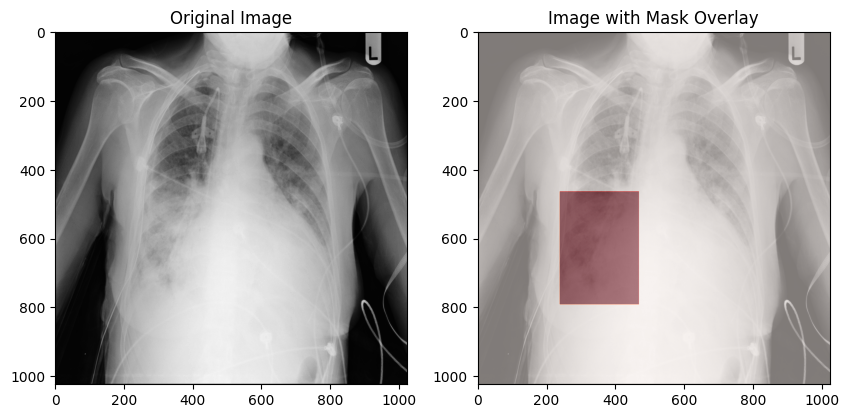

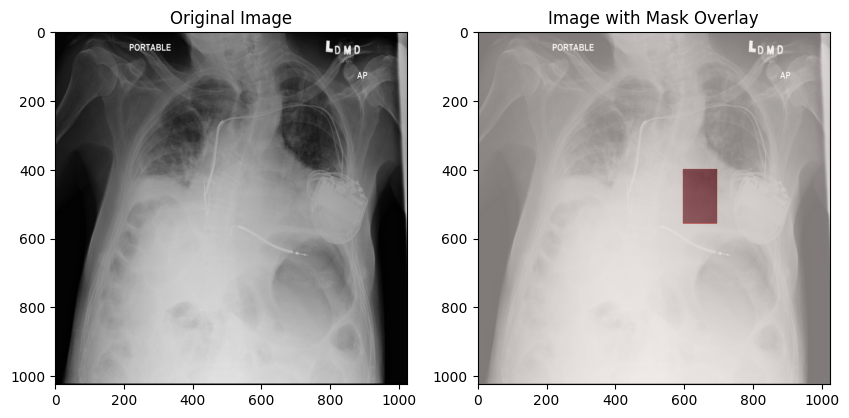

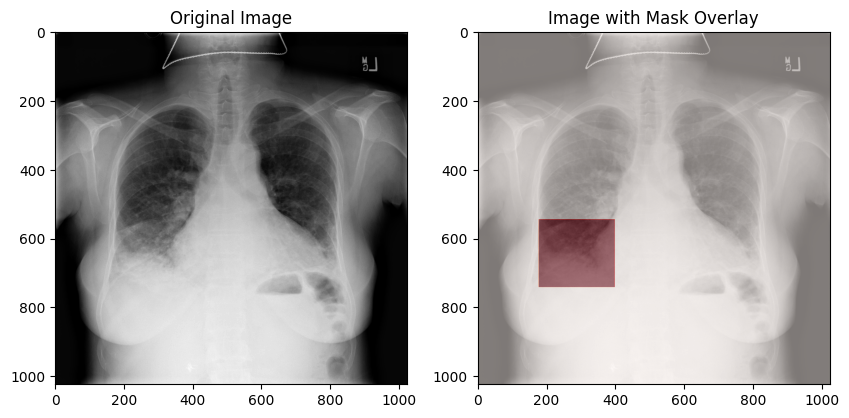

In [2]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to overlay mask on the image
def overlay_mask_on_image(image_path, mask_path):
    """Display an image with its mask overlay."""
    try:
        image = Image.open(image_path).convert("L")
        mask = Image.open(mask_path)
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(image, cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title("Image with Mask Overlay")
        plt.imshow(image, cmap="gray")
        plt.imshow(mask, alpha=0.5, cmap="Reds")
        plt.show()
    except FileNotFoundError:
        print(f"File not found: {image_path} or {mask_path}")

# Randomly pick 3 images and display overlays
image_dir = r"D:\edi5\image" # Replace with actual path to images
mask_dir = "D:\edi5\masks"    # Replace with actual path to masks

# Ensure bbox_data is loaded
random_samples = random.sample(bbox_data['Image Index'].unique().tolist(), 3)

for image_name in random_samples:
    image_path = os.path.join(image_dir, image_name)
    mask_path = os.path.join(mask_dir, f"{os.path.splitext(image_name)[0]}_mask.png")
    overlay_mask_on_image(image_path, mask_path)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def visualize_mask_overlay(image_path, mask_path, alpha=0.5, colormap='jet', img_size=(128, 128)):
    """
    Visualize the overlay of a mask on its corresponding image.
    
    Args:
    - image_path (str): Path to the image file.
    - mask_path (str): Path to the mask file.
    - alpha (float): Transparency level for the mask overlay (0 to 1).
    - colormap (str): Matplotlib colormap for the mask.
    - img_size (tuple): Resize dimensions for the image and mask (default: (128, 128)).
    
    Returns:
    - None: Displays the overlay.
    """
    try:
        # Load and preprocess the image
        image = Image.open(image_path).convert("L").resize(img_size)
        image = np.array(image) / 255.0  # Normalize to [0, 1]

        # Load and preprocess the mask
        mask = Image.open(mask_path).resize(img_size, Image.NEAREST)
        mask = np.array(mask)

        # Create the overlay
        plt.figure(figsize=(10, 5))

        # Original Image
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')

        # Mask
        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap=colormap, alpha=alpha)
        plt.title("Mask")
        plt.axis('off')

        # Overlay
        plt.subplot(1, 3, 3)
        plt.imshow(image, cmap='gray')
        plt.imshow(mask, cmap=colormap, alpha=alpha)
        plt.title("Overlay")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")

# Example Usage:
image_path = r"D:\edi5\image\00013118_008.png"
mask_path = r"D:\edi5\masks\00013118_008_mask.png"
visualize_mask_overlay(image_path, mask_path, alpha=0.5, colormap='jet', img_size=(128, 128))


In [7]:
# Extract unique labels from the dataset
all_labels = bbox_data['Finding Label'].dropna().unique()

# Split multi-label strings (if applicable) into individual labels
all_labels_split = [label.split('|') for label in all_labels]
unique_classes = set([item.strip() for sublist in all_labels_split for item in sublist])

# Sort classes alphabetically for consistency
sorted_classes = sorted(unique_classes)

# Display the unique sorted classes
print("Unique Classes in the Dataset:", sorted_classes)


Unique Classes in the Dataset: ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']


In [9]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Load the bounding box dataset/
bbox_data = pd.read_csv(r"D:/edi5/BBox_List_2017.csv")

# Drop rows with missing labels
bbox_data = bbox_data.dropna(subset=['Finding Label'])  # Ensure no missing labels

# Group labels by Image Index
classification_labels = bbox_data.groupby('Image Index')['Finding Label'].apply(list).reset_index()

# Ensure all labels are lists
classification_labels['Finding Label'] = classification_labels['Finding Label'].apply(
    lambda x: x if isinstance(x, list) else [x]
)

# Define the correct class order for MultiLabelBinarizer
class_order = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

# Multi-label encoding
mlb = MultiLabelBinarizer(classes=class_order)
classification_labels['Encoded Labels'] = list(mlb.fit_transform(classification_labels['Finding Label']))

# Convert encoded labels to a string for saving into CSV
classification_labels['Encoded Labels'] = classification_labels['Encoded Labels'].apply(
    lambda x: ','.join(map(str, x))  # Convert list to string for CSV storage
)

# Save processed labels to a CSV file
classification_labels.to_csv('D:/edi5/processed_labels.csv', index=False)

# Display results for verification
print("Unique Classes:", mlb.classes_)
print("Processed Labels:\n", classification_labels)

Unique Classes: ['Atelectasis' 'Cardiomegaly' 'Effusion' 'Infiltrate' 'Mass' 'Nodule'
 'Pneumonia' 'Pneumothorax']
Processed Labels:
           Image Index              Finding Label   Encoded Labels
0    00000032_037.png               [Infiltrate]  0,0,0,1,0,0,0,0
1    00000072_000.png              [Atelectasis]  1,0,0,0,0,0,0,0
2    00000147_001.png              [Atelectasis]  1,0,0,0,0,0,0,0
3    00000149_006.png              [Atelectasis]  1,0,0,0,0,0,0,0
4    00000150_002.png                [Pneumonia]  0,0,0,0,0,0,1,0
..                ...                        ...              ...
875  00030606_006.png             [Pneumothorax]  0,0,0,0,0,0,0,1
876  00030634_000.png                 [Effusion]  0,0,1,0,0,0,0,0
877  00030635_001.png              [Atelectasis]  1,0,0,0,0,0,0,0
878  00030636_004.png  [Infiltrate, Atelectasis]  1,0,0,1,0,0,0,0
879  00030674_000.png              [Atelectasis]  1,0,0,0,0,0,0,0

[880 rows x 3 columns]


In [11]:
# Drop unnecessary columns if they exist
bbox_data = bbox_data[['Image Index', 'Finding Label']]

# Optionally encode labels into a one-hot format
from sklearn.preprocessing import MultiLabelBinarizer

# Convert 'Finding Label' into one-hot encoding
mlb = MultiLabelBinarizer(classes=[
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltrate",
    "Mass", "Nodule", "Pneumonia", "Pneumothorax"
])
bbox_data['Encoded Labels'] = list(mlb.fit_transform(bbox_data['Finding Label'].str.split('|')))
print(f"Mapping of classes: {mlb.classes_}")
print("Processed labels DataFrame:")
print(bbox_data)


Mapping of classes: ['Atelectasis' 'Cardiomegaly' 'Effusion' 'Infiltrate' 'Mass' 'Nodule'
 'Pneumonia' 'Pneumothorax']
Processed labels DataFrame:
          Image Index Finding Label            Encoded Labels
0    00013118_008.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]
1    00014716_007.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]
2    00029817_009.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]
3    00014687_001.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]
4    00017877_001.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]
..                ...           ...                       ...
979  00029464_015.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]
980  00025769_001.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]
981  00016837_002.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]
982  00020124_003.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]
983  00026920_000.png   Atelectasis  [1, 0, 0, 0, 0, 0, 0, 0]

[984 rows x 3 columns]


In [13]:
# Select a specific image to validate
image_name = "00013118_008.png"

# Original labels from bbox_data
original_labels = bbox_data[bbox_data['Image Index'] == image_name]['Finding Label'].tolist()

# Processed labels from classification_labels
processed_labels = classification_labels[classification_labels['Image Index'] == image_name]['Finding Label'].iloc[0]

print(f"Original Labels for {image_name}: {original_labels}")
print(f"Processed Labels for {image_name}: {processed_labels}")


Original Labels for 00013118_008.png: ['Atelectasis']
Processed Labels for 00013118_008.png: ['Atelectasis']


In [15]:
# Merge the original and processed dataframes for comparison
validation_df = pd.merge(
    bbox_data[['Image Index', 'Finding Label']].drop_duplicates(),
    classification_labels[['Image Index', 'Finding Label']],
    on='Image Index',
    suffixes=('_original', '_processed')
)

# Check for mismatches
mismatches = validation_df[validation_df['Finding Label_original'] == validation_df['Finding Label_processed']]

if mismatches.empty:
    print("All labels are correctly assigned!")
else:
    print("Mismatched labels detected:")
    print(mismatches)


All labels are correctly assigned!


In [17]:
# Debug dataset preparation
for index, row in classification_labels.iterrows():
    image_name = row['Image Index']
    encoded_label = row['Encoded Labels']

    print(f"Image: {image_name}")
    print(f"Encoded Label: {encoded_label}")

    # Check if image and mask exist
    image_path = os.path.join(r"D:\edi5\image", image_name)
    mask_path = os.path.join(r"D:\edi5\masks", os.path.splitext(image_name)[0] + "_mask.png")

    if not os.path.exists(image_path) or not os.path.exists(mask_path):
        print(f"Missing image or mask for {image_name}")


Image: 00000032_037.png
Encoded Label: 0,0,0,1,0,0,0,0
Image: 00000072_000.png
Encoded Label: 1,0,0,0,0,0,0,0
Image: 00000147_001.png
Encoded Label: 1,0,0,0,0,0,0,0
Image: 00000149_006.png
Encoded Label: 1,0,0,0,0,0,0,0
Image: 00000150_002.png
Encoded Label: 0,0,0,0,0,0,1,0
Image: 00000181_061.png
Encoded Label: 1,0,0,0,0,0,0,0
Image: 00000193_019.png
Encoded Label: 0,0,0,0,0,0,1,0
Image: 00000211_010.png
Encoded Label: 1,0,0,0,0,0,0,0
Image: 00000211_016.png
Encoded Label: 0,0,0,1,0,0,0,0
Image: 00000211_019.png
Encoded Label: 0,1,0,0,0,0,0,0
Image: 00000211_041.png
Encoded Label: 0,1,0,0,0,0,0,0
Image: 00000344_003.png
Encoded Label: 0,0,1,0,0,0,0,0
Image: 00000377_004.png
Encoded Label: 0,1,0,0,0,0,0,0
Image: 00000398_003.png
Encoded Label: 0,1,0,0,0,0,0,0
Image: 00000457_004.png
Encoded Label: 1,0,0,0,0,0,0,0
Image: 00000468_017.png
Encoded Label: 1,0,0,0,0,0,0,0
Image: 00000468_033.png
Encoded Label: 1,0,0,0,0,0,0,0
Image: 00000468_041.png
Encoded Label: 0,0,0,1,0,0,0,0
Image: 000

In [19]:
print("Available columns in classification_labels:")
print(classification_labels.columns)


Available columns in classification_labels:
Index(['Image Index', 'Finding Label', 'Encoded Labels'], dtype='object')


In [21]:
# Check encoding for multi-label entries
classification_labels['Encoded Labels'] = classification_labels['Finding Label'].apply(
    lambda x: mlb.transform([x])[0] if isinstance(x, list) else mlb.transform([[x]])[0]
)

# Inspect the first few encoded labels
print(classification_labels[['Image Index', 'Encoded Labels']])


          Image Index            Encoded Labels
0    00000032_037.png  [0, 0, 0, 1, 0, 0, 0, 0]
1    00000072_000.png  [1, 0, 0, 0, 0, 0, 0, 0]
2    00000147_001.png  [1, 0, 0, 0, 0, 0, 0, 0]
3    00000149_006.png  [1, 0, 0, 0, 0, 0, 0, 0]
4    00000150_002.png  [0, 0, 0, 0, 0, 0, 1, 0]
..                ...                       ...
875  00030606_006.png  [0, 0, 0, 0, 0, 0, 0, 1]
876  00030634_000.png  [0, 0, 1, 0, 0, 0, 0, 0]
877  00030635_001.png  [1, 0, 0, 0, 0, 0, 0, 0]
878  00030636_004.png  [1, 0, 0, 1, 0, 0, 0, 0]
879  00030674_000.png  [1, 0, 0, 0, 0, 0, 0, 0]

[880 rows x 2 columns]


In [23]:
# Check available columns
print("Available columns in classification_labels:")
print(classification_labels.columns)

# Inspect a sample
print("Sample from classification_labels:")
print(classification_labels.head())

# Use the correct column for processed labels
if 'Finding Label_processed' in classification_labels.columns:
    column_to_use = 'Finding Label_processed'
else:
    column_to_use = 'Finding Label'  # Fallback to the original column if processed column is missing

# Multi-label encoding
classification_labels['Encoded Labels'] = classification_labels[column_to_use].apply(
    lambda x: mlb.transform([x])[0] if isinstance(x, list) else mlb.transform([[x]])[0]
)

# Inspect the result
print("Processed labels with encoding:")
print(classification_labels[['Image Index', 'Encoded Labels']])


Available columns in classification_labels:
Index(['Image Index', 'Finding Label', 'Encoded Labels'], dtype='object')
Sample from classification_labels:
        Image Index  Finding Label            Encoded Labels
0  00000032_037.png   [Infiltrate]  [0, 0, 0, 1, 0, 0, 0, 0]
1  00000072_000.png  [Atelectasis]  [1, 0, 0, 0, 0, 0, 0, 0]
2  00000147_001.png  [Atelectasis]  [1, 0, 0, 0, 0, 0, 0, 0]
3  00000149_006.png  [Atelectasis]  [1, 0, 0, 0, 0, 0, 0, 0]
4  00000150_002.png    [Pneumonia]  [0, 0, 0, 0, 0, 0, 1, 0]
Processed labels with encoding:
          Image Index            Encoded Labels
0    00000032_037.png  [0, 0, 0, 1, 0, 0, 0, 0]
1    00000072_000.png  [1, 0, 0, 0, 0, 0, 0, 0]
2    00000147_001.png  [1, 0, 0, 0, 0, 0, 0, 0]
3    00000149_006.png  [1, 0, 0, 0, 0, 0, 0, 0]
4    00000150_002.png  [0, 0, 0, 0, 0, 0, 1, 0]
..                ...                       ...
875  00030606_006.png  [0, 0, 0, 0, 0, 0, 0, 1]
876  00030634_000.png  [0, 0, 1, 0, 0, 0, 0, 0]
877  00030635_001

In [25]:
# Check if all images have encoded labels
print("Total images in dataset:", len(classification_labels))
print("Number of encoded labels:", classification_labels['Encoded Labels'].notnull().sum())

# Inspect any rows with missing encoded labels
missing_labels = classification_labels[classification_labels['Encoded Labels'].isnull()]
if not missing_labels.empty:
    print("Images with missing labels:")
    print(missing_labels)
else:
    print("All images have encoded labels!")


Total images in dataset: 880
Number of encoded labels: 880
All images have encoded labels!


In [27]:
classification_labels

,Image Index,Finding Label,Encoded Labels
0,00000032_037.png,[Infiltrate],"[0, 0, 0, 1, 0, 0, 0, 0]"
1,00000072_000.png,[Atelectasis],"[1, 0, 0, 0, 0, 0, 0, 0]"
2,00000147_001.png,[Atelectasis],"[1, 0, 0, 0, 0, 0, 0, 0]"
3,00000149_006.png,[Atelectasis],"[1, 0, 0, 0, 0, 0, 0, 0]"
4,00000150_002.png,[Pneumonia],"[0, 0, 0, 0, 0, 0, 1, 0]"
...,...,...,...
875,00030606_006.png,[Pneumothorax],"[0, 0, 0, 0, 0, 0, 0, 1]"
876,00030634_000.png,[Effusion],"[0, 0, 1, 0, 0, 0, 0, 0]"
877,00030635_001.png,[Atelectasis],"[1, 0, 0, 0, 0, 0, 0, 0]"
878,00030636_004.png,"[Infiltrate, Atelectasis]","[1, 0, 0, 1, 0, 0, 0, 0]"


In [29]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths to original image and mask directories
original_image_dir = r"D:\edi5\image"
original_mask_dir = r"D:\edi5\masks"

# Paths to train, test, and validation directories
base_dir = r"D:\edi5\dataset_split"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir = os.path.join(base_dir, "validation")

# Create subdirectories for train, test, and validation
for split in [train_dir, test_dir, val_dir]:
    os.makedirs(os.path.join(split, "images"), exist_ok=True)
    os.makedirs(os.path.join(split, "masks"), exist_ok=True)

# List all image files
image_files = sorted(os.listdir(original_image_dir))
mask_files = sorted(os.listdir(original_mask_dir))

# Ensure images and masks are aligned
assert len(image_files) == len(mask_files), "Mismatch between image and mask counts!"

# Train-test-validation split (e.g., 70% train, 20% test, 10% validation)
train_files, test_files = train_test_split(image_files, test_size=0.3, random_state=42)
test_files, val_files = train_test_split(test_files, test_size=0.33, random_state=42)  # 33% of 30% for validation

# Function to copy files
def copy_files(file_list, src_dir, dest_dir, subdir_name):
    for file_name in file_list:
        src_image = os.path.join(src_dir, file_name)
        dest_image = os.path.join(dest_dir, subdir_name, "images", file_name)

        mask_name = os.path.splitext(file_name)[0] + "_mask.png"
        src_mask = os.path.join(original_mask_dir, mask_name)
        dest_mask = os.path.join(dest_dir, subdir_name, "masks", mask_name)

        # Copy image and mask if both exist
        if os.path.exists(src_image) and os.path.exists(src_mask):
            shutil.copy(src_image, dest_image)
            shutil.copy(src_mask, dest_mask)

# Copy files to respective directories
copy_files(train_files, original_image_dir, base_dir, "train")
copy_files(test_files, original_image_dir, base_dir, "test")
copy_files(val_files, original_image_dir, base_dir, "validation")

print("Dataset split and directories created successfully!")


Dataset split and directories created successfully!


In [31]:
for split in ['train', 'test', 'validation']:
    images_count = len(os.listdir(os.path.join(base_dir, split, "images")))
    masks_count = len(os.listdir(os.path.join(base_dir, split, "masks")))
    print(f"{split.capitalize()} - Images: {images_count}, Masks: {masks_count}")


Train - Images: 616, Masks: 616
Test - Images: 176, Masks: 176
Validation - Images: 88, Masks: 88


In [33]:
def prepare_dataset(directory, labels_csv_path):
    """
    Prepare a dataset from the specified directory and corresponding labels CSV.

    Args:
    - directory: Base path to the train/test/validation split directory.
    - labels_csv_path: Path to the CSV file containing the image index and labels.

    Returns:
    - dataset: List of dictionaries containing image paths, mask paths, and labels.
    """
    import pandas as pd
    import os

    # Define image and mask directories within the split
    images_dir = os.path.join(directory, "images")
    masks_dir = os.path.join(directory, "masks")

    # Load labels CSV
    labels_df = pd.read_csv(labels_csv_path)
    labels_dict = labels_df.set_index("Image Index")["Encoded Labels"].to_dict()

    # Initialize dataset
    dataset = []

    for image_index, label in labels_dict.items():
        # Remove any existing extensions and append .png
        image_index = os.path.splitext(image_index)[0]
        image_filename = f"{image_index}.png"
        mask_filename = f"{image_index}_mask.png"
        image_path = os.path.join(images_dir, image_filename)
        mask_path = os.path.join(masks_dir, mask_filename)

        # Validate existence of image and mask
        if os.path.exists(image_path) and os.path.exists(mask_path):
            dataset.append({
                "image_path": image_path,
                "mask_path": mask_path,
                "label": label
            })
        else:
            print(f"File missing: Image - {image_path} or Mask - {mask_path}, skipping.")

    print(f"Prepared dataset from {labels_csv_path}: {len(dataset)} entries.")
    return dataset


In [35]:
train_labels_csv = r"D:\edi5\dataset_split\train\train_labels.csv"
train_dataset = prepare_dataset(r"D:\edi5\dataset_split\train", train_labels_csv)


Prepared dataset from D:\edi5\dataset_split\train\train_labels.csv: 616 entries.


In [37]:
val_labels_csv = r"D:\edi5\dataset_split\validation\val_labels.csv"
val_dataset = prepare_dataset(r"D:\edi5\dataset_split\validation", val_labels_csv)


Prepared dataset from D:\edi5\dataset_split\validation\val_labels.csv: 88 entries.


In [39]:
test_labels_csv = r"D:\edi5\dataset_split\test\test_labels.csv"
test_dataset = prepare_dataset(r"D:\edi5\dataset_split\test", test_labels_csv)


Prepared dataset from D:\edi5\dataset_split\test\test_labels.csv: 176 entries.


In [41]:
# Inspect the structure of the first sample in the dataset
print(train_dataset[0])


{'image_path': 'D:\\edi5\\dataset_split\\train\\images\\00000032_037.png', 'mask_path': 'D:\\edi5\\dataset_split\\train\\masks\\00000032_037_mask.png', 'label': '0,0,0,1,0,0,0,0'}


Image Index: 00000032_037.png
Encoded Label: 0,0,0,1,0,0,0,0


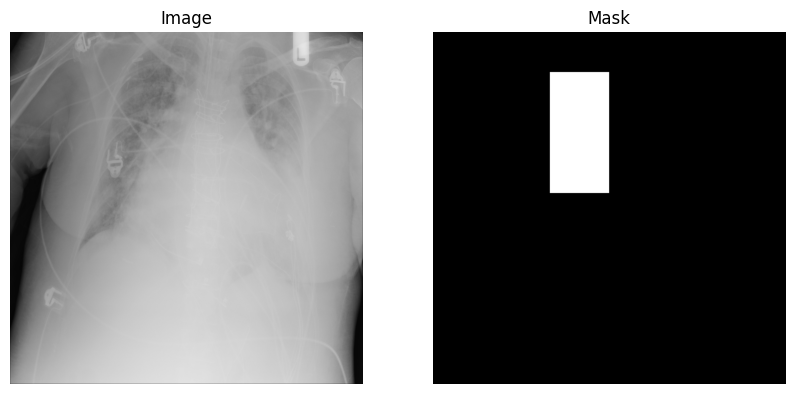

Image Index: 00000072_000.png
Encoded Label: 1,0,0,0,0,0,0,0


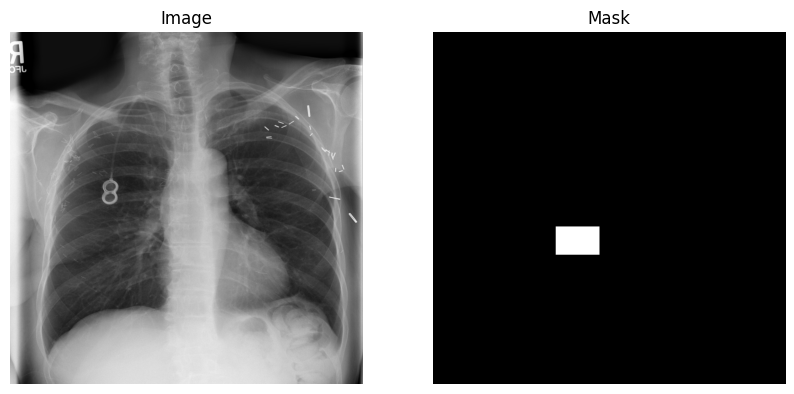

Image Index: 00000149_006.png
Encoded Label: 1,0,0,0,0,0,0,0


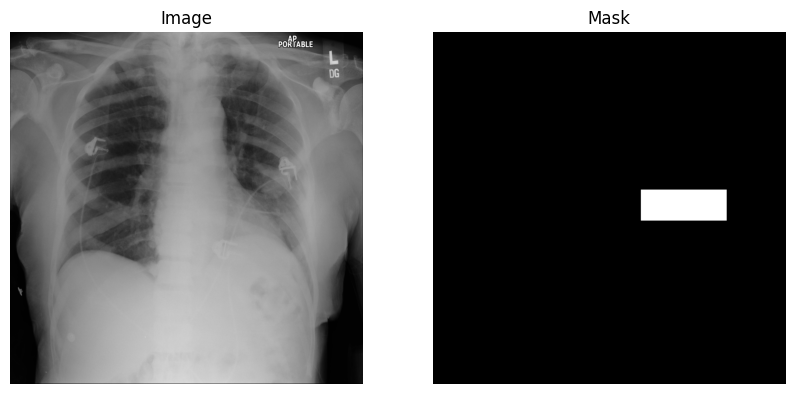

Image Index: 00000150_002.png
Encoded Label: 0,0,0,0,0,0,1,0


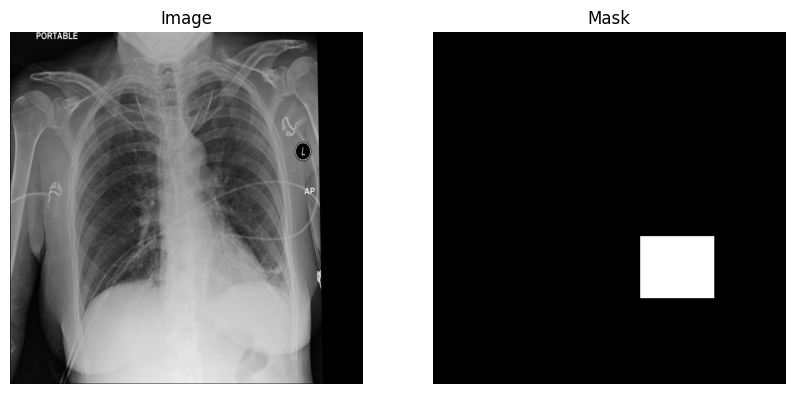

Image Index: 00000193_019.png
Encoded Label: 0,0,0,0,0,0,1,0


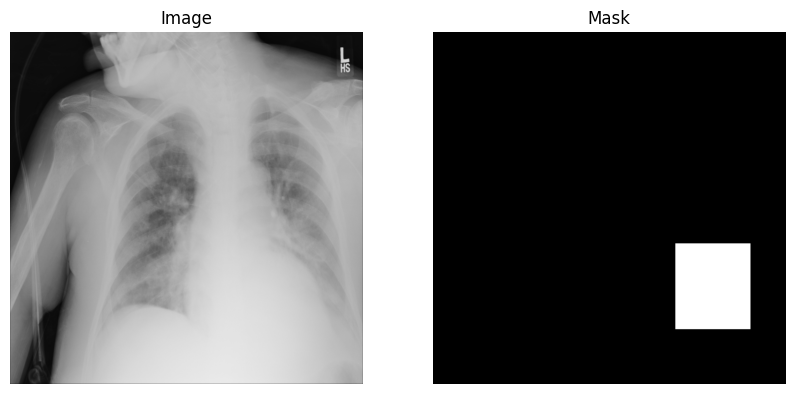

In [43]:
import matplotlib.pyplot as plt
import cv2

def visualize_sample(dataset, num_samples=5):
    """
    Visualize samples from the dataset along with their encoded labels and image indices.

    Parameters:
    - dataset: List of dictionaries containing "image_path", "mask_path", and "label".
    - num_samples: Number of samples to visualize.
    """
    for i in range(num_samples):
        sample = dataset[i]
        image = cv2.imread(sample["image_path"])
        mask = cv2.imread(sample["mask_path"], cv2.IMREAD_GRAYSCALE)
        image_index = os.path.basename(sample["image_path"])  # Extract the image index from the path
        encoded_label = sample["label"]

        print(f"Image Index: {image_index}")
        print(f"Encoded Label: {encoded_label}")

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")
        plt.title("Mask")
        plt.axis("off")

        plt.show()

# Visualize some samples from the train dataset
visualize_sample(train_dataset)


In [45]:
import numpy as np
import cv2

def prepare_data(dataset, target_size=(128, 128)):
    """
    Prepare data by resizing, normalizing, and extracting labels.
    """
    images, masks, labels = [], [], []

    for sample in dataset:
        try:
            # Load and resize images and masks
            image = cv2.imread(sample["image_path"])
            mask = cv2.imread(sample["mask_path"], cv2.IMREAD_GRAYSCALE)

            # Resize to target dimensions
            image = cv2.resize(image, target_size)
            mask = cv2.resize(mask, target_size)

            # Normalize image (scale pixel values to [0, 1])
            image = image.astype(np.float32) / 255.0
            mask = mask.astype(np.float32) / 255.0

            # Convert label to list of integers
            label = list(map(int, sample["label"].split(",")))

            # Append to lists
            images.append(image)
            masks.append(mask)
            labels.append(label)
        except Exception as e:
            print(f"Error processing {sample['image_path']} or {sample['mask_path']}: {e}")
            continue

    # Convert lists to numpy arrays
    return np.array(images), np.array(masks), np.array(labels)

# Prepare train, val, and test datasets
X_images_train, Y_masks_train, Y_labels_train = prepare_data(train_dataset)
X_images_val, Y_masks_val, Y_labels_val = prepare_data(val_dataset)
X_images_test, Y_masks_test, Y_labels_test = prepare_data(test_dataset)

# Check shapes and ranges
print(f"Train Images Shape: {X_images_train.shape}, Min: {X_images_train.min()}, Max: {X_images_train.max()}")
print(f"Train Masks Shape: {Y_masks_train.shape}, Min: {Y_masks_train.min()}, Max: {Y_masks_train.max()}")
print(f"Train Labels Shape: {Y_labels_train.shape}")


Train Images Shape: (616, 128, 128, 3), Min: 0.0, Max: 1.0
Train Masks Shape: (616, 128, 128), Min: 0.0, Max: 1.0
Train Labels Shape: (616, 8)


In [47]:
# Check shapes for train dataset
print(f"Train Images Shape: {X_images_train.shape}, Min: {X_images_train.min()}, Max: {X_images_train.max()}")
print(f"Train Masks Shape: {Y_masks_train.shape}, Min: {Y_masks_train.min()}, Max: {Y_masks_train.max()}")
print(f"Train Labels Shape: {Y_labels_train.shape}")

# Check shapes for validation dataset
print(f"Validation Images Shape: {X_images_val.shape}, Min: {X_images_val.min()}, Max: {X_images_val.max()}")
print(f"Validation Masks Shape: {Y_masks_val.shape}, Min: {Y_masks_val.min()}, Max: {Y_masks_val.max()}")
print(f"Validation Labels Shape: {Y_labels_val.shape}")

# Check shapes for test dataset
print(f"Test Images Shape: {X_images_test.shape}, Min: {X_images_test.min()}, Max: {X_images_test.max()}")
print(f"Test Masks Shape: {Y_masks_test.shape}, Min: {Y_masks_test.min()}, Max: {Y_masks_test.max()}")
print(f"Test Labels Shape: {Y_labels_test.shape}")


Train Images Shape: (616, 128, 128, 3), Min: 0.0, Max: 1.0
Train Masks Shape: (616, 128, 128), Min: 0.0, Max: 1.0
Train Labels Shape: (616, 8)
Validation Images Shape: (88, 128, 128, 3), Min: 0.0, Max: 1.0
Validation Masks Shape: (88, 128, 128), Min: 0.0, Max: 1.0
Validation Labels Shape: (88, 8)
Test Images Shape: (176, 128, 128, 3), Min: 0.0, Max: 1.0
Test Masks Shape: (176, 128, 128), Min: 0.0, Max: 1.0
Test Labels Shape: (176, 8)


In [49]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_sample_by_name(images, masks, labels, image_names, class_names, image_name):
    """
    Visualize an image, its mask, and its multi-label annotations using the image name.

    Args:
    - images (ndarray): Array of images (X_images).
    - masks (ndarray): Array of masks (Y_masks).
    - labels (ndarray): Array of labels (Y_labels).
    - image_names (list): List of image names corresponding to the dataset.
    - class_names (list): List of class names corresponding to label indices.
    - image_name (str): The name of the image to visualize.

    Returns:
    - None: Displays the image, mask, and labels.
    """
    try:
        # Find the index of the image name
        index = image_names.index(image_name)
    except ValueError:
        print(f"Image name '{image_name}' not found in dataset.")
        return

    # Visualize the sample
    plt.figure(figsize=(15, 5))

    # Image (Denormalize for visualization if needed)
    image = (images[index] * 255).astype(np.uint8) if images.max() <= 1 else images[index]
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Image: {image_name}")
    plt.axis('off')

    # Mask (Denormalize if applicable)
    mask = (masks[index] * 255).astype(np.uint8) if masks.max() <= 1 else masks[index]
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis('off')

    # Labels
    plt.subplot(1, 3, 3)
    plt.bar(range(len(class_names)), labels[index])
    plt.title("Labels")
    plt.xticks(range(len(class_names)), class_names, rotation=90)
    plt.tight_layout()

    plt.show()

    # Print class names for active labels
    active_classes = [class_names[i] for i, val in enumerate(labels[index]) if val == 1]
    print(f"Active Classes for '{image_name}': {active_classes}")


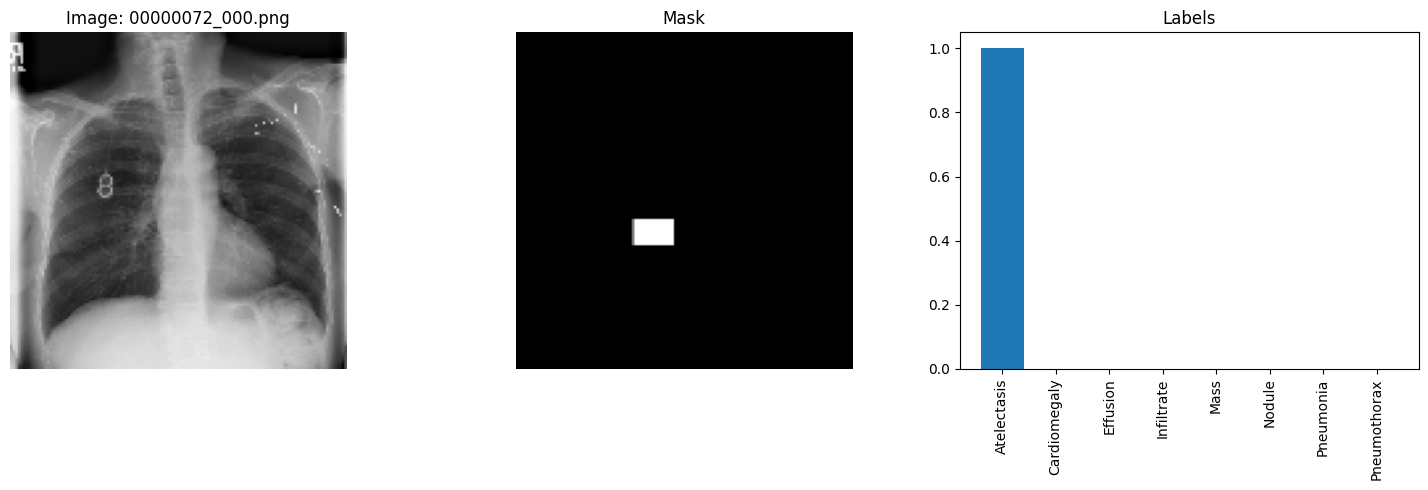

Active Classes for '00000072_000.png': ['Atelectasis']


In [181]:
# Define image names and class names
image_names = [os.path.basename(sample["image_path"]) for sample in train_dataset]
class_names = mlb.classes_

# Specify an image name to visualize
specified_image_name = "00000072_000.png"

# Ensure specified_image_name exists in the dataset
if specified_image_name in image_names:
    # Visualize the specified image
    visualize_sample_by_name(X_images_train, Y_masks_train, Y_labels_train, image_names, class_names, specified_image_name)
else:
    print(f"Image '{specified_image_name}' not found in the dataset.")


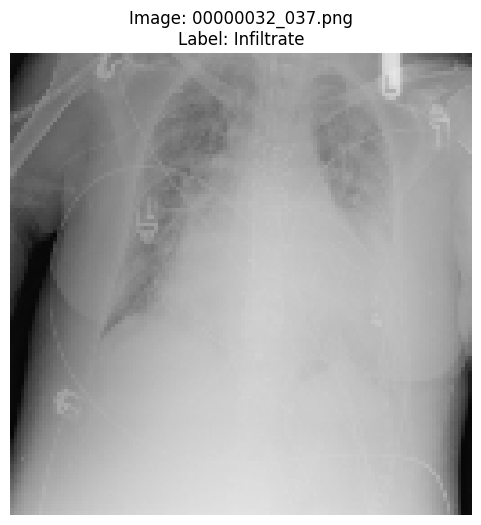

In [177]:
import matplotlib.pyplot as plt

def visualize_image_and_label(X_images, Y_labels, image_names, class_names, index=2):
    """
    Visualize an image alongside its corresponding label.

    Args:
    - X_images (ndarray): Images of shape (num_samples, height, width, channels).
    - Y_labels (ndarray): One-hot encoded labels of shape (num_samples, num_classes).
    - image_names (list): List of image names corresponding to the dataset.
    - class_names (list): List of class names in the same order as encoded labels.
    - index (int): Index of the image/label to visualize.
    """
    if index >= len(X_images) or index >= len(image_names):
        print(f"Index {index} is out of bounds for the dataset.")
        return

    # Extract the image and label
    image = X_images[index]
    label = Y_labels[index]
    image_name = image_names[index]

    # Decode the label
    active_classes = [class_names[i] for i, val in enumerate(label) if val == 1]

    # Reshape the image if it's grayscale
    if image.ndim == 3 and image.shape[-1] == 1:
        image = image.squeeze()

    # Plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
    plt.title(f"Image: {image_name}\nLabel: {', '.join(active_classes) if active_classes else 'No labels'}")
    plt.axis('off')
    plt.show()

# Example usage
image_index = 0  # Replace with the desired index
visualize_image_and_label(X_images_train, Y_labels_train, image_names, mlb.classes_, index=image_index)


In [55]:
from collections import Counter
labels = [label for sublist in classification_labels['Finding Label'] for label in sublist]
print(Counter(labels))


Counter({'Atelectasis': 180, 'Effusion': 153, 'Cardiomegaly': 146, 'Infiltrate': 123, 'Pneumonia': 120, 'Pneumothorax': 98, 'Mass': 85, 'Nodule': 79})


In [57]:
# Example: Label distribution
print("Train Label Distribution:")
print(Y_labels_train.sum(axis=0))

print("Validation Label Distribution:")
print(Y_labels_val.sum(axis=0))

print("Test Label Distribution:")
print(Y_labels_test.sum(axis=0))


Train Label Distribution:
[118 102 110  90  53  61  83  69]
Validation Label Distribution:
[17 14 16 11 13  6 13  9]
Test Label Distribution:
[45 30 27 22 19 12 24 20]


In [61]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Count the number of samples for each class in the multi-label setting
class_counts = Y_labels_train.sum(axis=0)

# Calculate the total number of samples
total_samples = Y_labels_train.shape[0]

# Compute class weights manually for multi-label classification
class_weights = total_samples / (len(class_counts) * class_counts)

# Convert to a dictionary for easy usage
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights for Multi-Label Classification:", class_weights_dict)


Class Weights for Multi-Label Classification: {0: 0.652542372881356, 1: 0.7549019607843137, 2: 0.7, 3: 0.8555555555555555, 4: 1.4528301886792452, 5: 1.2622950819672132, 6: 0.927710843373494, 7: 1.1159420289855073}


In [67]:
def prepare_dataset(image_dir, mask_dir, balanced_data=None, target_size=(128, 128)):
    # Your logic to load images, masks, and labels
    if balanced_data is not None:
        print("Using balanced dataset")
    # Implement your code to prepare the dataset
    # Return the dataset
    return X_images_train, Y_masks_train, Y_labels_train

# Now call it with the third argument, balanced_data
X_images, Y_masks, Y_labels = prepare_dataset(
    r"D:\edi5\image", r"D:\edi5\masks", balanced_data=balanced_data
)


Using balanced dataset


In [69]:
import tensorflow as tf

# Check original data shapes and ranges
print("Original shape of X_images_train:", X_images_train.shape)
print("Min value of X_images_train:", tf.reduce_min(X_images_train).numpy())
print("Max value of X_images_train:", tf.reduce_max(X_images_train).numpy())

print("Original shape of Y_masks_train:", Y_masks_train.shape)
print("Min value of Y_masks_train:", tf.reduce_min(Y_masks_train).numpy())
print("Max value of Y_masks_train:", tf.reduce_max(Y_masks_train).numpy())

print("Original shape of Y_labels_train:", Y_labels_train.shape)
print("Unique values in Y_labels_train:", tf.unique(tf.reshape(Y_labels_train, [-1]))[0].numpy())


Original shape of X_images_train: (616, 128, 128, 3)
Min value of X_images_train: 0.0
Max value of X_images_train: 1.0
Original shape of Y_masks_train: (616, 128, 128)
Min value of Y_masks_train: 0.0
Max value of Y_masks_train: 1.0
Original shape of Y_labels_train: (616, 8)
Unique values in Y_labels_train: [0 1]


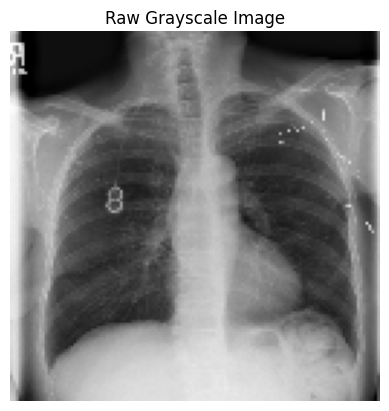

In [71]:
# Convert grayscale to RGB (if grayscale data is valid)
X_train_3ch = tf.repeat(X_images_train, repeats=3, axis=-1)

import matplotlib.pyplot as plt

# Visualize the first grayscale image from X_train
plt.imshow(X_images_train[1].squeeze(), cmap="gray")
plt.title("Raw Grayscale Image")
plt.axis('off')
plt.show()


In [73]:
print("Original shape of X_train_3ch:", X_train_3ch.shape)


Original shape of X_train_3ch: (616, 128, 128, 9)


In [75]:
# Extract the first 3 channels (e.g., RGB) if that's what you need
X_train_3ch = X_train_3ch[:, :, :, :3]
print(X_train_3ch.shape)  # Should now be (616, 256, 256, 3)


(616, 128, 128, 3)


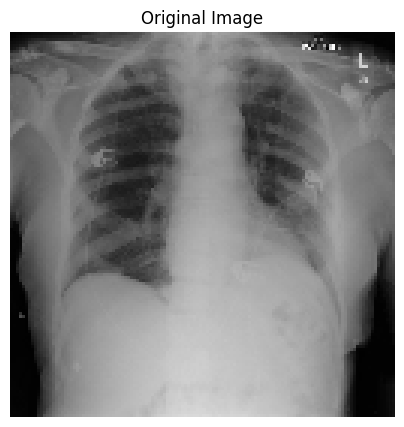

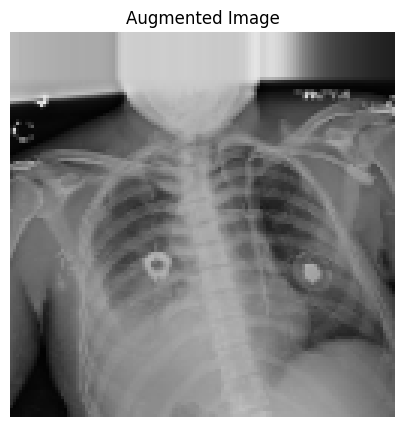

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define data generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

# Augment images
augmented_images = datagen.flow(X_train_3ch, batch_size=16)

# Visualize the original image
original_image = (X_train_3ch[2]*255).numpy().astype("uint8")  # Convert TensorFlow tensor to NumPy array
plt.figure(figsize=(5, 5))
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Visualize the first augmented image
for batch in augmented_images:
    augmented_image = (batch[2] * 255).astype("uint8")  # Rescale and convert to uint8
    plt.figure(figsize=(5, 5))
    plt.imshow(augmented_image)
    plt.title("Augmented Image")
    plt.axis('off')
    plt.show()
    break


In [79]:
for batch in augmented_images:
    print("Augmented batch min value:", batch[0].min())
    print("Augmented batch max value:", batch[0].max())
    break


Augmented batch min value: 0.48203057
Augmented batch max value: 0.99607843


In [81]:
for batch in augmented_images:
    print("Shape of augmented image:", batch[0].shape)
    break


Shape of augmented image: (128, 128, 3)


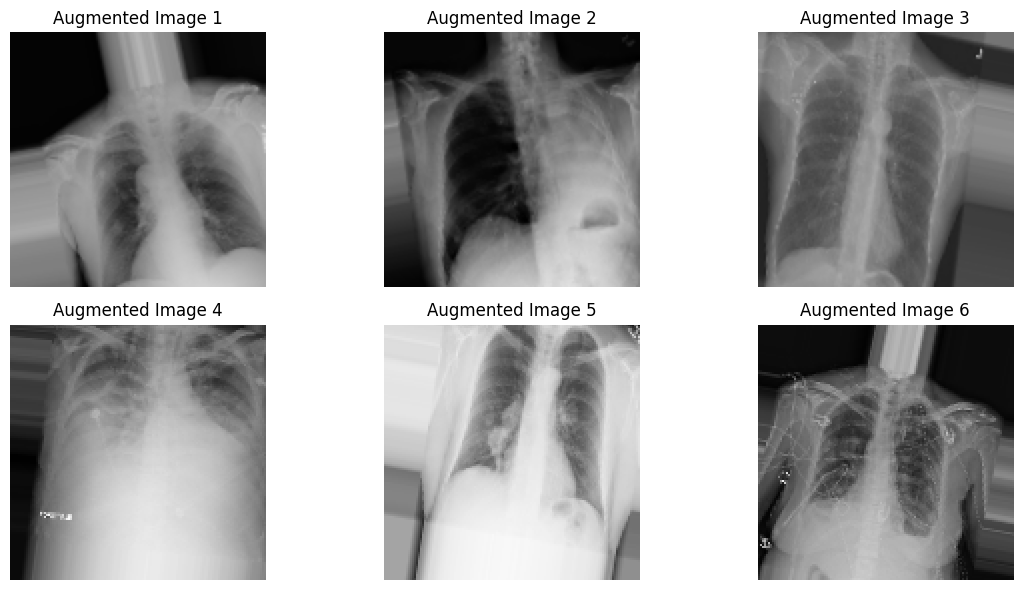

In [83]:
# Visualize multiple augmented images
plt.figure(figsize=(12, 6))
for i in range(6):  # Display 6 augmented images
    batch = next(augmented_images)  # Get the next batch
    augmented_image = (batch[0] * 255).astype("uint8")  # Rescale and convert to uint8
    plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image, cmap="gray")
    plt.title(f"Augmented Image {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [85]:
# Check unique values in the training labels
print("Unique encoded labels in training set:", np.unique(Y_labels_train))

# Check unique values in the validation labels
print("Unique encoded labels in validation set:", np.unique(Y_labels_val))

# Check unique values in the test labels
print("Unique encoded labels in test set:", np.unique(Y_labels_test))

# Verify no NaN or invalid values in training labels
assert not np.any(np.isnan(Y_labels_train)), "Training labels contain NaN values"

# Verify no NaN or invalid values in validation labels
assert not np.any(np.isnan(Y_labels_val)), "Validation labels contain NaN values"

# Verify no NaN or invalid values in test labels
assert not np.any(np.isnan(Y_labels_test)), "Test labels contain NaN values"

print("All labels are valid and contain no NaN values.")


Unique encoded labels in training set: [0 1]
Unique encoded labels in validation set: [0 1]
Unique encoded labels in test set: [0 1]
All labels are valid and contain no NaN values.


In [87]:
# Check data ranges for training set
print("Training Images range:", X_images_train.min(), X_images_train.max())
print("Training Masks range:", Y_masks_train.min(), Y_masks_train.max())
print("Training Labels range:", Y_labels_train.min(), Y_labels_train.max())

# Check data ranges for validation set
print("Validation Images range:", X_images_val.min(), X_images_val.max())
print("Validation Masks range:", Y_masks_val.min(), Y_masks_val.max())
print("Validation Labels range:", Y_labels_val.min(), Y_labels_val.max())

# Check data ranges for test set
print("Test Images range:", X_images_test.min(), X_images_test.max())
print("Test Masks range:", Y_masks_test.min(), Y_masks_test.max())
print("Test Labels range:", Y_labels_test.min(), Y_labels_test.max())


Training Images range: 0.0 1.0
Training Masks range: 0.0 1.0
Training Labels range: 0 1
Validation Images range: 0.0 1.0
Validation Masks range: 0.0 1.0
Validation Labels range: 0 1
Test Images range: 0.0 1.0
Test Masks range: 0.0 1.0
Test Labels range: 0 1


In [89]:
# Check the number of unique classes in labels for the training, validation, and test datasets
print("Number of unique classes in training labels:", Y_labels_train.shape[1])  # Should match num_classes
print("Number of unique classes in validation labels:", Y_labels_val.shape[1])  # Should match num_classes
print("Number of unique classes in test labels:", Y_labels_test.shape[1])  # Should match num_classes

# Dynamically determine the number of classes from the training labels (assuming they are consistent)
num_classes = Y_labels_train.shape[1]
print("Total number of classes (from training set):", num_classes)


Number of unique classes in training labels: 8
Number of unique classes in validation labels: 8
Number of unique classes in test labels: 8
Total number of classes (from training set): 8


In [91]:
import tensorflow as tf

# Verify the shapes to confirm the number of channels
print("Training images shape:", X_images_train.shape)
print("Validation images shape:", X_images_val.shape)
print("Testing images shape:", X_images_test.shape)

# If any dataset still has only 1 channel, you can expand it using np.repeat:
if X_images_train.shape[-1] == 1:
    X_images_train_3ch = tf.convert_to_tensor(np.repeat(X_images_train, 3, axis=-1))
else:
    X_images_train_3ch = tf.convert_to_tensor(X_images_train)

if X_images_val.shape[-1] == 1:
    X_images_val_3ch = tf.convert_to_tensor(np.repeat(X_images_val, 3, axis=-1))
else:
    X_images_val_3ch = tf.convert_to_tensor(X_images_val)

if X_images_test.shape[-1] == 1:
    X_images_test_3ch = tf.convert_to_tensor(np.repeat(X_images_test, 3, axis=-1))
else:
    X_images_test_3ch = tf.convert_to_tensor(X_images_test)

print("New Training Shape:", X_images_train_3ch.shape)  # Should be (num_samples, height, width, 3)
print("New Validation Shape:", X_images_val_3ch.shape)  # Should be (num_samples, height, width, 3)
print("New Testing Shape:", X_images_test_3ch.shape)  # Should be (num_samples, height, width, 3)


Training images shape: (616, 128, 128, 3)
Validation images shape: (88, 128, 128, 3)
Testing images shape: (176, 128, 128, 3)
New Training Shape: (616, 128, 128, 3)
New Validation Shape: (88, 128, 128, 3)
New Testing Shape: (176, 128, 128, 3)


In [93]:
print("X_train shape:", X_train_3ch.shape)  # Should be (num_samples, 128, 128, 3)
print("X_test shape:", X_images_test_3ch.shape)    # Should be (num_samples, 128, 128, 3)


X_train shape: (616, 128, 128, 3)
X_test shape: (176, 128, 128, 3)


In [95]:
# Ensure that masks have the correct shape
if len(Y_masks_train.shape) == 3:  # If masks are missing the channel dimension
    Y_masks_train = np.expand_dims(Y_masks_train, axis=-1)
if len(Y_masks_test.shape) == 3:  # If masks are missing the channel dimension
    Y_masks_test = np.expand_dims(Y_masks_test, axis=-1)

# Print the shape of the masks to confirm
print("Y_masks_train shape:", Y_masks_train.shape)  # Should be (num_samples, height, width, 1)
print("Y_masks_test shape:", Y_masks_test.shape)    # Should be (num_samples, height, width, 1)


Y_masks_train shape: (616, 128, 128, 1)
Y_masks_test shape: (176, 128, 128, 1)


In [97]:
print("Y_labels_train shape:", Y_labels_train.shape)  # Should match the number of classes
print("Y_labels_test shape:", Y_labels_test.shape)


Y_labels_train shape: (616, 8)
Y_labels_test shape: (176, 8)


In [99]:
# Find the original label for the specific image
image_name = "00008814_010.png"
original_label = bbox_data.loc[bbox_data['Image Index'] == image_name, 'Finding Label']
print(f"Original label for {image_name}: {original_label.values}")


Original label for 00008814_010.png: ['Effusion' 'Infiltrate' 'Atelectasis']


In [101]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
import tensorflow as tf
import tensorflow.keras.backend as K



# Convert class weights dictionary to array
class_weights_array = tf.constant(
    [class_weights_dict[i] for i in range(len(class_weights_dict))],
    dtype=tf.float32
)

# Custom Class-Weighted Loss Function for Multi-Label Classification
def class_weighted_loss(class_weights):
    """
    A custom loss function that applies class weights to categorical cross-entropy.
    
    Args:
    - class_weights (Tensor): Tensor of weights for each class.
    
    Returns:
    - A callable loss function.
    """
    def loss(y_true, y_pred):
        # Apply softmax to predictions if they are logits
        y_pred = tf.nn.softmax(y_pred)

        # Calculate weights based on the true labels
        weights = tf.reduce_sum(class_weights * y_true, axis=-1)

        # Compute categorical crossentropy
        unweighted_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

        # Apply class weights
        weighted_loss = unweighted_loss * weights
        return tf.reduce_mean(weighted_loss)
    return loss

# Focal Loss Function for Multi-Label Classification
def focal_loss(gamma=2., alpha=0.25):
    """
    Focal Loss function to handle class imbalance.

    Args:
    - gamma (float): Modulating factor to down-weight well-classified examples.
    - alpha (float): Balancing factor for the positive class.

    Returns:
    - A callable loss function.
    """
    def focal_loss_fixed(y_true, y_pred):
        # Clip predictions to avoid NaNs in log computation
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1. - K.epsilon())

        # Compute focal loss
        pt = tf.reduce_sum(y_true * y_pred, axis=-1)
        loss = -alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt)

        return tf.reduce_mean(loss)
    return focal_loss_fixed

# Example Class-Weighted Loss
classification_loss = class_weighted_loss(class_weights_array)

# Example Focal Loss
segmentation_loss = focal_loss(gamma=2., alpha=0.25)

# Initialize optimizer
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)


In [103]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

def build_unet(input_shape=(128, 128, 3)):
    """
    Define a U-Net model for segmentation.

    Args:
    - input_shape: Shape of the input image.

    Returns:
    - A compiled U-Net model.
    """
    inputs = Input(shape=input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = BatchNormalization()(c3)

    # Decoder
    u1 = UpSampling2D((2, 2))(c3)
    u1 = Concatenate()([u1, c2])
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    c4 = BatchNormalization()(c4)

    u2 = UpSampling2D((2, 2))(c4)
    u2 = Concatenate()([u2, c1])
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    c5 = BatchNormalization()(c5)

    # Output Layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid', name='segmentation')(c5)

    model = Model(inputs, outputs, name="U-Net")
    return model

# Define the segmentation model
segmentation_model = build_unet(input_shape=(128, 128, 3))
segmentation_model.summary()


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 384)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    442,496 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128, 128,  │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 192)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │    110,656 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_4[0][0]  

 Total params: 926,593 (3.53 MB)

 Trainable params: 925,313 (3.53 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [105]:
print("Shape of Y_masks_train before expanding dimensions:", Y_masks_train.shape)


Shape of Y_masks_train before expanding dimensions: (616, 128, 128, 1)


In [107]:
# Resize masks to match model output size (128x128)
Y_masks_train_resized = tf.image.resize(Y_masks_train, [128, 128])
Y_masks_val_resized = tf.image.resize(Y_masks_val, [128, 128])
Y_masks_test_resized = tf.image.resize(Y_masks_test, [128, 128])

# Ensure masks remain binary (if needed)
Y_masks_train_resized = tf.round(Y_masks_train_resized)
Y_masks_val_resized = tf.round(Y_masks_val_resized)
Y_masks_test_resized = tf.round(Y_masks_test_resized)

# Check shapes
print("Resized Train Mask Shape:", Y_masks_train_resized.shape)
print("Resized Validation Mask Shape:", Y_masks_val_resized.shape)
print("Resized Test Mask Shape:", Y_masks_test_resized.shape)


Resized Train Mask Shape: (616, 128, 128, 1)
Resized Validation Mask Shape: (128, 128, 128)
Resized Test Mask Shape: (176, 128, 128, 1)


In [111]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the U-Net model for segmentation
segmentation_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',  # Consider using Dice loss for better segmentation results
    metrics=['accuracy']
)

# Train the U-Net model
history_segmentation = segmentation_model.fit(
    X_images_train_3ch, Y_masks_train,  # Training data for segmentation
    validation_data=(X_images_val_3ch, Y_masks_val),  # Validation data
    epochs=7,
    batch_size=16,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
    ]
)

# Evaluate the segmentation model
segmentation_evaluation = segmentation_model.evaluate(X_images_test_3ch, Y_masks_test)
print("Segmentation Evaluation Results:", segmentation_evaluation)


Epoch 1/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7178 - loss: 0.6273 - val_accuracy: 0.9134 - val_loss: 0.5830 - learning_rate: 5.0000e-04
Epoch 2/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8565 - loss: 0.5308 - val_accuracy: 0.9134 - val_loss: 0.4659 - learning_rate: 5.0000e-04
Epoch 3/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.8981 - loss: 0.4571 - val_accuracy: 0.9134 - val_loss: 0.4363 - learning_rate: 5.0000e-04
Epoch 4/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9125 - loss: 0.3927 - val_accuracy: 0.9134 - val_loss: 0.3789 - learning_rate: 5.0000e-04
Epoch 5/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9161 - loss: 0.3385 - val_accuracy: 0.9134 - val_loss: 0.3534 - learning_rate: 5.0000e-04
Epoch 6/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9271 - loss: 0.2931 - val_accuracy: 0.9134 - val_loss: 0.3382 - learning_rate: 5.0000e-04
Epoch 7/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9196 - loss: 0.2747

ValueError: Cannot take the length of shape with unknown rank.

In [113]:
# Ensure data types and shapes
X_images_test_3ch = tf.cast(X_images_test_3ch, tf.float32)
Y_masks_test = tf.cast(Y_masks_test, tf.float32)

# Check tensor compatibility
assert segmentation_model.input.shape[1:] == X_images_test_3ch.shape[1:], \
    "Input shape mismatch"
assert segmentation_model.output.shape[1:] == Y_masks_test.shape[1:], \
    "Output shape mismatch"

# Recompile the model if necessary
segmentation_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Evaluate the model
segmentation_evaluation = segmentation_model.evaluate(X_images_test_3ch, Y_masks_test)
print("Segmentation Evaluation Results:", segmentation_evaluation)


6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 667ms/step - accuracy: 0.9277 - loss: 0.2794
Segmentation Evaluation Results: [0.28127798438072205, 0.9264564514160156]


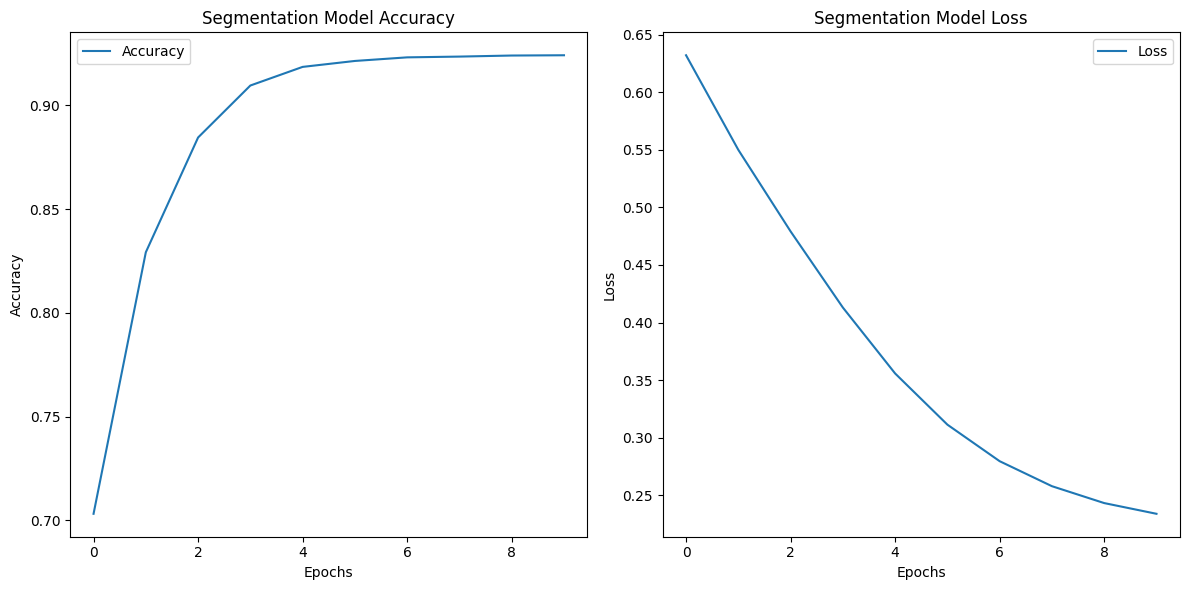

In [125]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_segmentation.history['accuracy'], label='Accuracy')
plt.title('Segmentation Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_segmentation.history['loss'], label='Loss')

plt.title('Segmentation Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [114]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_densenet(input_shape=(128, 128, 3), num_classes=8):
    """
    Define a DenseNet-based model for classification.

    Args:
    - input_shape: Shape of the input image.
    - num_classes: Number of output classes.

    Returns:
    - A compiled DenseNet-based classification model.
    """
    # Load pre-trained DenseNet backbone
    densenet_base = DenseNet121(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape, 
        pooling='avg'
    )

    # Classification head
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(densenet_base.output)
    x = Dropout(0.5)(x)  # Regularization
    outputs = Dense(num_classes, activation='softmax', name='classification')(x)

    model = Model(densenet_base.input, outputs, name="DenseNet")
    return model

# Define the classification model
classification_model = build_densenet(input_shape=(128, 128, 3), num_classes=8)
classification_model.summary()


Model: "DenseNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 134, 134,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 32, 32,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 32, 32,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 32, 32,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 32, 32,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 32, 32,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 32, 32,    │     12,288 │ conv2_block2_0_r

 Total params: 7,301,960 (27.85 MB)

 Trainable params: 7,218,312 (27.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [119]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights for classification
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Y_labels_train.argmax(axis=1)),
    y=Y_labels_train.argmax(axis=1)
)
class_weights_dict = dict(enumerate(class_weights))

# Compile the DenseNet model for classification
classification_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=focal_loss(alpha=0.25, gamma=2.0),  # Use class-weighted loss if needed
    metrics=['accuracy']
)

# Train the DenseNet model
history_classification = classification_model.fit(
    X_train_3ch, Y_labels_train,  # Classification data
    validation_data=(X_images_test_3ch, Y_labels_test),
    epochs=25,
    batch_size=16,
    class_weight=class_weights_dict,  # Apply class weights
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
    ]
)

# Evaluate the classification model
classification_evaluation = classification_model.evaluate(X_image_test_3ch, Y_labels_test)
print("Classification Evaluation Results:", classification_evaluation)


Epoch 1/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 88s 763ms/step - accuracy: 0.1393 - loss: 3.8466 - val_accuracy: 0.1875 - val_loss: 2.5446 - learning_rate: 0.0010
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 661ms/step - accuracy: 0.1835 - loss: 1.8082 - val_accuracy: 0.1648 - val_loss: 1.3674 - learning_rate: 0.0010
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 661ms/step - accuracy: 0.2117 - loss: 1.2118 - val_accuracy: 0.2557 - val_loss: 1.0193 - learning_rate: 0.0010
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 670ms/step - accuracy: 0.2808 - loss: 0.8751 - val_accuracy: 0.2898 - val_loss: 0.7723 - learning_rate: 0.0010
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 670ms/step - accuracy: 0.3490 - loss: 0.6798 - val_accuracy: 0.1932 - val_loss: 1.1791 - learning_rate: 0.0010
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 661ms/step - accuracy: 0.3124 - loss: 0.5587 - val_accuracy: 0.2102 - val_loss: 0.6261 - learning_rate: 0.0010
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 27s 696ms/step - accuracy: 0.3268 - loss: 0.

NameError: name 'X_image_test_3ch' is not defined

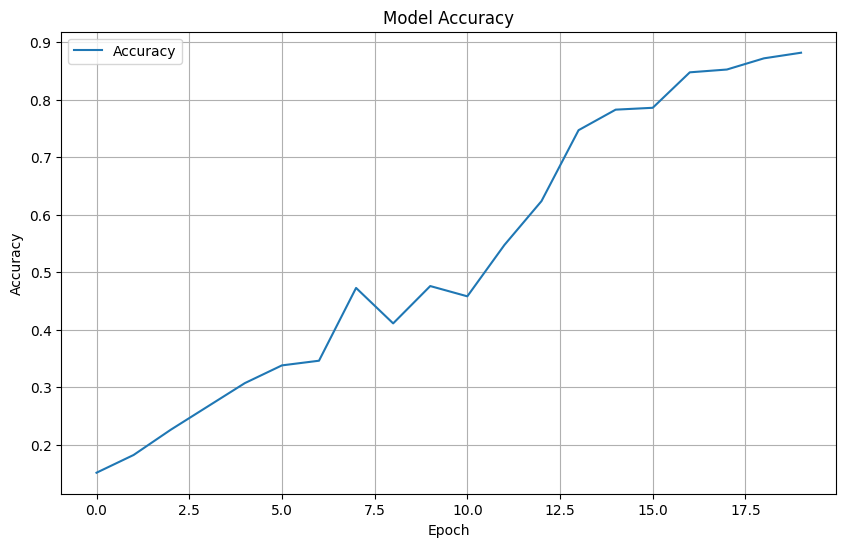

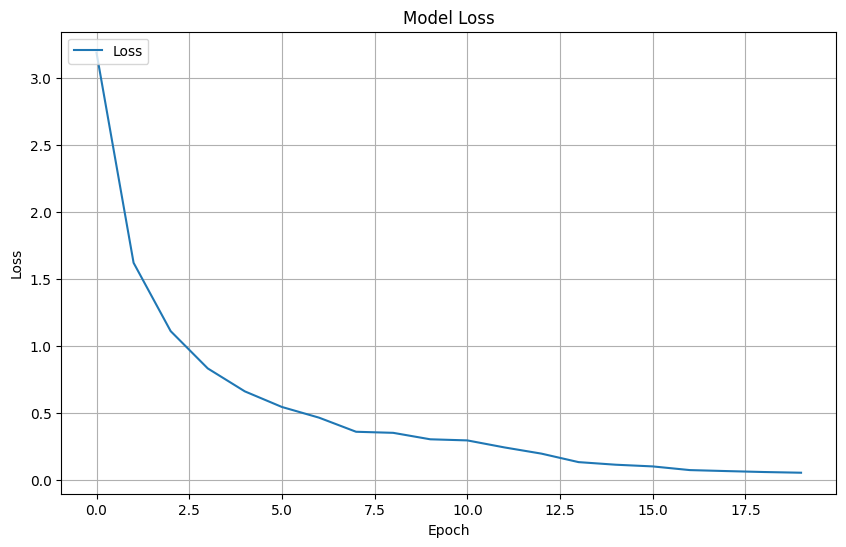

In [131]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history_classification.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history_classification.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Classes: [0]


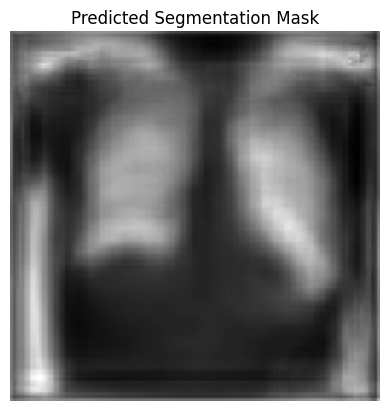

In [167]:
def predict(image):
    """
    Perform inference using the trained segmentation and classification models.

    Args:
    - image: Input image for prediction.

    Returns:
    - classification_output: Predicted class probabilities.
    - segmentation_output: Predicted segmentation mask.
    """
    segmentation_output = segmentation_model.predict(image)
    classification_output = classification_model.predict(image)
    return classification_output, segmentation_output

# Example usage
image_index = 0# Replace with the desired index
image = X_images_test_3ch[image_index:image_index + 1]
classification_output, segmentation_output = predict(image)

print("Predicted Classes:", classification_output.argmax(axis=-1))
plt.imshow(segmentation_output[0, :, :, 0], cmap='gray')
plt.title("Predicted Segmentation Mask")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


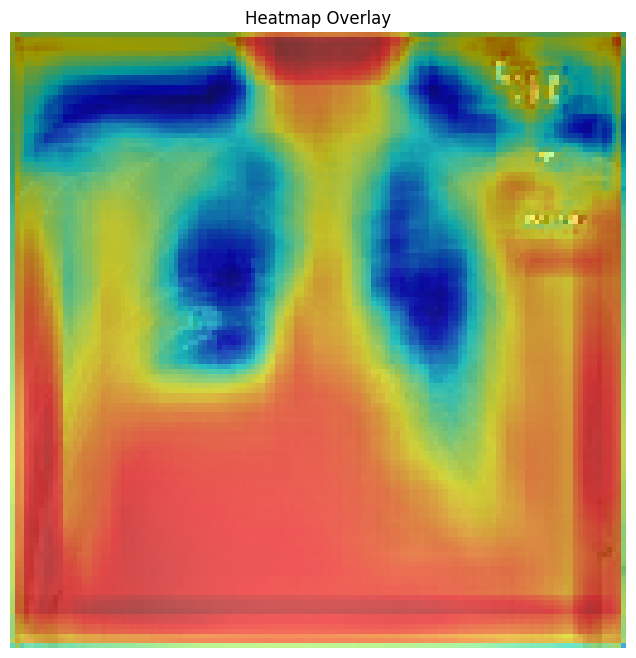

In [169]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

def visualize_heatmap_overlay(image, mask, alpha=0.6, colormap=cv2.COLORMAP_JET):
    """
    Overlay the predicted mask as a heatmap on the original image.

    Args:
    - image (ndarray or Tensor): Original grayscale or RGB image.
    - mask (ndarray or Tensor): Predicted segmentation mask.
    - alpha (float): Transparency for the heatmap.
    - colormap (int): OpenCV colormap to use.

    Returns:
    - None (displays the overlayed image).
    """
    # Convert tensors to numpy arrays
    if tf.is_tensor(image):
        image = image.numpy()
    if tf.is_tensor(mask):
        mask = mask.numpy()

    # Normalize the mask to [0, 255]
    mask = (mask - mask.min()) / (mask.max() - mask.min()) * 255
    mask = mask.astype(np.uint8)

    # Apply a colormap to the mask
    heatmap = cv2.applyColorMap(mask, colormap)

    # Convert grayscale image to RGB if needed
    if len(image.shape) == 2 or image.shape[-1] == 1:
        image_rgb = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)
    else:
        image_rgb = (image * 255).astype(np.uint8)

    # Overlay the heatmap on the original image
    overlay = cv2.addWeighted(image_rgb, 1 - alpha, heatmap, alpha, 0)

    # Display the overlayed image
    plt.figure(figsize=(8, 8))
    plt.imshow(overlay)
    plt.title("Heatmap Overlay")
    plt.axis('off')
    plt.show()

# Example Usage
image = X_images_test_3ch[1]  # Example input image (ensure it's normalized to [0, 1])
predicted_mask = segmentation_model.predict(image[np.newaxis, ...])[0, :, :, 0]

visualize_heatmap_overlay(image, predicted_mask)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Image Name: 00000072_000.png
Predicted Class: Atelectasis


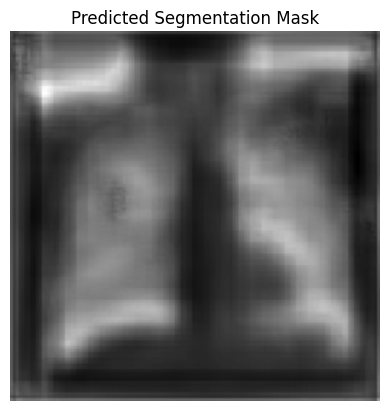

In [173]:
def predict(image, image_index, image_names, class_names):
    """
    Perform inference using the trained segmentation and classification models.

    Args:
    - image: Input image for prediction.
    - image_index: Index of the image in the dataset.
    - image_names: List of image names corresponding to the dataset.
    - class_names: List of class names corresponding to classification labels.

    Returns:
    - classification_output: Predicted class probabilities.
    - segmentation_output: Predicted segmentation mask.
    """
    segmentation_output = segmentation_model.predict(image)
    classification_output = classification_model.predict(image)
    
    # Get the predicted class name
    predicted_class_index = classification_output.argmax(axis=-1)[0]
    predicted_class_name = class_names[predicted_class_index]

    # Get the image name
    image_name = image_names[image_index]
    
    return classification_output, segmentation_output, predicted_class_name, image_name


image_index = 1  






image = X_images_train_3ch[image_index:image_index + 1]
classification_output, segmentation_output, predicted_class_name, image_name = predict(
    image, image_index, image_names, mlb.classes_
)

# Display results
print(f"Image Name: {image_name}")
print(f"Predicted Class: {predicted_class_name}")
plt.imshow(segmentation_output[0, :, :, 0], cmap='gray')
plt.title("Predicted Segmentation Mask")
plt.axis('off')
plt.show()
